In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


- 각 피쳐별 산점도와 선형회귀선

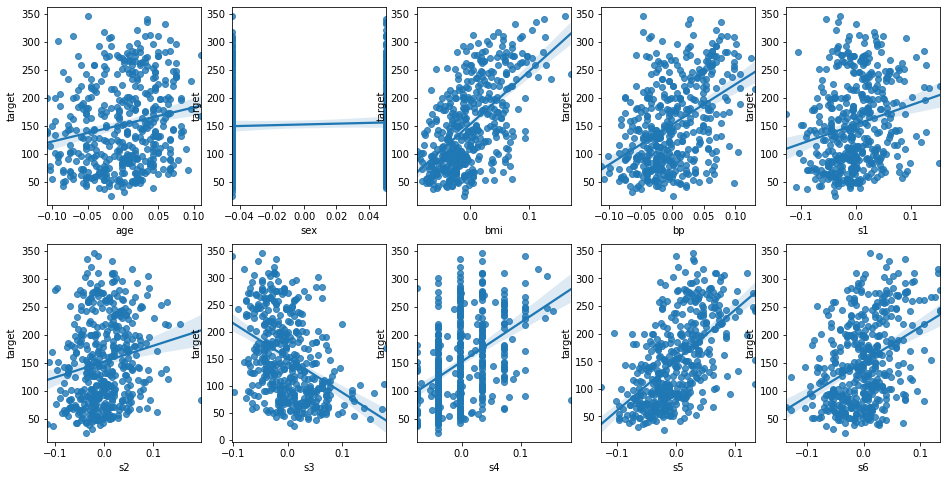

In [3]:
_, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,8))
for i, feature in enumerate(df.columns[:-1]):
    row, col = i//5, i%5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

- 각 피쳐별 R squared value

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
y = diabetes.target
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{feature}: {r2:.4f}')

age: 0.0353
sex: 0.0019
bmi: 0.3439
bp: 0.1949
s1: 0.0450
s2: 0.0303
s3: 0.1559
s4: 0.1853
s5: 0.3202
s6: 0.1463


- dataset 분리

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.1, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

Regressor 별 MSE 비교

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [8]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, pred_lr)

In [9]:
# SVR
svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)
mse_sv = mean_squared_error(y_test, pred_sv)

In [10]:
# Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
mse_rf = mean_squared_error(y_test, pred_rf)

- 결과 비교

In [11]:
# MSE
print(f'LR: {mse_lr:.4f}, SVR: {mse_sv:.4f}, RFR: {mse_rf:.4f}')

LR: 2370.1979, SVR: 3960.9367, RFR: 3757.2278


In [12]:
# 실제값과 예측값 비교
df = pd.DataFrame({
    'y_test':y_test, 'LR':pred_lr, 'SVR':pred_sv, 'RFR':pred_rf
})
df.head(10)

,y_test,LR,SVR,RFR
0,155.0,156.031216,133.705341,110.10
1,167.0,185.700495,146.907788,145.07
2,185.0,162.863840,140.965960,176.69
3,109.0,162.545441,144.683128,159.23
4,65.0,78.518494,118.088552,84.79
5,77.0,60.600694,124.899794,92.21
6,277.0,175.198247,152.459542,164.04
7,244.0,176.770871,153.097167,164.09
8,148.0,131.425197,121.363033,102.00
9,102.0,88.053772,129.184107,144.95


In [13]:
a = 1.0
for i in range(100):
    a += 0.01
a

2.000000000000001